**Importing Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_image, train_label), (test_image, test_label) = datasets.cifar10.load_data()

# Normalising pixel values to be between 0 to 1
train_image, test_image = train_image / 255.0, test_image/255.0

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
len(train_image), len(test_image)

(50000, 10000)

**Verify the data**

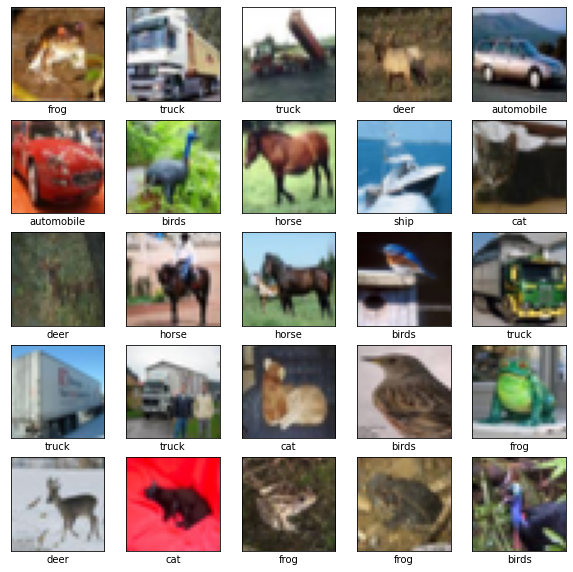

In [ ]:
class_names = ['airplane', 'automobile', 'birds', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i][0]])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 31, 32)        608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,032
Trainable params: 56,032
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 31, 32)        608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_image, train_label, epochs=20,
                    validation_data=(test_image, test_label))

Epoch 1/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.7527 - accuracy: 0.3468 - val_loss: 1.3250 - val_accuracy: 0.5319
Epoch 2/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1946 - accuracy: 0.5753 - val_loss: 1.0471 - val_accuracy: 0.6299
Epoch 3/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0286 - accuracy: 0.6404 - val_loss: 0.9733 - val_accuracy: 0.6582
Epoch 4/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9260 - accuracy: 0.6761 - val_loss: 0.9059 - val_accuracy: 0.6859
Epoch 5/20
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8558 - accuracy: 0.6991 - val_loss: 0.9055 - val_accuracy: 0.6825
Epoch 6/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7906 - accuracy: 0.7226 - val_loss: 0.8743 - val_accuracy: 0.7005
Epoch 7/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7553 - accuracy: 0.7350 - val_loss: 0.8661 -

**Evaluation  Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_image, test_label, verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 1.0909 - accuracy: 0.6973


In [ ]:
print(test_acc)

0.6973000168800354
